In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Oil consumption by country df
con_df = pd.read_csv("C:/Users/user/Desktop/Houdini/country_oil_consumption_analysis/Oil_Consumption_by_Country_1965_to_2023.csv")
con_df.head()

,Entity,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Africa,342.133700,370.450000,369.19354,390.365700,398.153260,435.02704,474.305400,510.729600,549.803960,...,2144.31420,2202.63060,2221.60620,2265.23630,2299.4292,2295.12060,2055.27830,2242.39450,2361.33700,2358.96680
1,Africa (EI),342.133700,370.450000,369.19350,390.365700,398.153260,435.02707,474.305360,510.729600,549.804000,...,2144.31420,2202.63060,2221.60600,2265.23630,2299.4292,2295.12060,2055.27830,2242.39480,2361.33700,2358.96680
2,Algeria,15.405252,20.272705,18.94203,20.167301,21.305931,24.34768,27.440048,30.121414,32.900345,...,221.92514,236.14848,229.56384,225.51212,227.7859,236.95130,211.92543,221.20369,226.85338,238.20117
3,Argentina,275.215900,283.876300,290.73495,296.797200,308.011440,278.43550,296.501100,295.186200,297.198640,...,379.91560,387.81003,375.90500,371.47742,354.6256,321.83243,288.19510,350.89080,411.80594,391.43518
4,Asia,2249.215000,2581.326200,2914.79130,3263.277300,3828.259300,4448.17870,4877.736300,5359.248000,6035.336000,...,21917.21900,22717.43400,23577.45900,24234.17600,24661.9820,24869.03100,23509.30000,24311.85000,23162.40600,24282.18800


## *Overall information about the datasets*

In [2]:
def get_df_info(df): 
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    
    print("\n\033[1mYEARS UNDER ANALYSIS:\033[0m ", df.columns)
    
    print("\n\033[1mData types of columns:\033[0m ", df.dtypes)
    
    print("\n\033[1mInformation about the DataFrame:\033[0m ")
    df.info()
    
    print("\n\033[1mNumber of regions analysed:\033[0m ")
    
    print(f"\033[1m{df.iloc[:, 0]}\033m[0m: {df.iloc[:, 0].nunique()}")
    
    print("\n\033[1mNumber of null values in each column:\033[0m ", df.isnull().sum())
    
    
    print("\n\033[1mNumber of duplicated rows:\033[0m ", df.duplicated().sum())
    
    print("\n\033[1mDescriptive statistics of the DataFrame:\033[0m\n", )
    
    return df.describe()
    
# Call the function
get_df_info(con_df)   



Shape of DataFrame:  (104, 60)

YEARS UNDER ANALYSIS:  Index(['Entity', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

Data types of columns:  Entity     object
1965      float64
1966      float64
1967      float64
1968      float64
1969      float64
1970      float64
1971      float64
1972      float64
1973      float64
1974      float64
1975      float64
1976      float64
1977      float64
1978      float64
1979      float64
1980      float64
1981      float64
1982      float64
1983      float64
1984 

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,91.000000,91.000000,91.000000,91.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,102.000000,102.000000
mean,1231.772611,1329.920774,1423.412424,1543.645699,1678.980711,1833.389063,1911.144854,2061.460498,2223.603794,2184.961925,...,2932.023534,2988.860744,3052.635243,3105.789836,3135.047148,3140.222186,2852.356870,3014.530729,3086.189235,3160.258764
std,3086.405075,3320.061377,3545.383267,3840.419355,4169.315609,4537.315559,4739.352585,5107.331487,5493.439027,5344.114428,...,7247.815301,7405.960819,7567.884709,7705.662531,7792.246459,7809.736328,7123.911476,7511.426181,7667.911266,7880.924026
min,0.097381,0.121861,0.540983,0.651908,0.928511,0.935906,1.079497,1.284886,1.668016,2.277880,...,9.023058,9.844438,10.842629,12.105062,12.717900,11.098069,7.309943,8.265473,10.365225,9.735639
25%,34.443466,39.789376,43.739943,49.930669,53.069058,55.972895,58.590988,61.416086,63.598319,64.458065,...,108.744115,112.441956,113.478777,117.120005,122.282735,122.007972,102.629173,113.680805,117.994765,117.880961
50%,76.968705,84.602330,82.771165,94.107393,106.500113,116.761712,119.607025,129.122880,142.779540,142.951570,...,307.402650,323.041600,333.976840,355.189580,354.625600,333.533450,288.195100,341.011960,313.825550,323.559185
75%,580.915230,639.321698,683.726750,733.324850,768.914675,818.702348,812.510190,861.366475,935.592280,947.856800,...,1425.410700,1410.376350,1434.734100,1435.837550,1398.782900,1388.455850,1317.213800,1413.538000,1342.089750,1366.415450
max,18012.520000,19427.398000,20779.828000,22511.285000,24446.174000,26672.713000,28117.908000,30331.375000,32722.135000,32224.648000,...,50011.830000,50977.210000,52060.850000,52978.800000,53521.387000,53618.926000,48745.684000,51530.492000,53226.840000,54564.000000


In [3]:
con_df.head()

,Entity,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Africa,342.133700,370.450000,369.19354,390.365700,398.153260,435.02704,474.305400,510.729600,549.803960,...,2144.31420,2202.63060,2221.60620,2265.23630,2299.4292,2295.12060,2055.27830,2242.39450,2361.33700,2358.96680
1,Africa (EI),342.133700,370.450000,369.19350,390.365700,398.153260,435.02707,474.305360,510.729600,549.804000,...,2144.31420,2202.63060,2221.60600,2265.23630,2299.4292,2295.12060,2055.27830,2242.39480,2361.33700,2358.96680
2,Algeria,15.405252,20.272705,18.94203,20.167301,21.305931,24.34768,27.440048,30.121414,32.900345,...,221.92514,236.14848,229.56384,225.51212,227.7859,236.95130,211.92543,221.20369,226.85338,238.20117
3,Argentina,275.215900,283.876300,290.73495,296.797200,308.011440,278.43550,296.501100,295.186200,297.198640,...,379.91560,387.81003,375.90500,371.47742,354.6256,321.83243,288.19510,350.89080,411.80594,391.43518
4,Asia,2249.215000,2581.326200,2914.79130,3263.277300,3828.259300,4448.17870,4877.736300,5359.248000,6035.336000,...,21917.21900,22717.43400,23577.45900,24234.17600,24661.9820,24869.03100,23509.30000,24311.85000,23162.40600,24282.18800


## *Reshape dataFrame for analysis*

In [2]:
con_df.drop(0, inplace=True)
con_df['Entity'] = con_df['Entity'].str.replace(' ', '_')

con_df.dropna(how = "any", inplace = True)
con_df.set_index('Entity', inplace = True) # Set Entity as the index
con_df = con_df.transpose()  # Transpose df 
con_df.reset_index(inplace=True)
# Set year as index
con_df.rename(columns={'index': 'Year'}, inplace=True)
con_df['Year'] = pd.to_datetime(con_df['Year'], format='%Y')
con_df['Year'] = con_df['Year'].dt.year
con_df.set_index('Year', inplace=True)

#Rearange the columns
income_grouping = ['High-income_countries','Upper-middle-income_countries',
                          'Lower-middle-income_countries']
EI = con_df.loc[:, con_df.columns.str.contains(r'\(EI\)')].columns
continents = ['Europe','European_Union_(27)',
              'Asia', 'North_America', 'South_America']
Columns = [*income_grouping, *EI, *continents]

for col in con_df.columns:
    if col == 'World':
        Columns.insert(0, 'World')
    elif col not in Columns:
        Columns.append(col)
          
con_df = con_df[Columns]


print("DataFrame shape:", con_df.shape)
con_df.head()


DataFrame shape: (59, 87)


Entity,World,High-income_countries,Upper-middle-income_countries,Lower-middle-income_countries,Africa_(EI),Asia_Pacific_(EI),CIS_(EI),Central_America_(EI),Eastern_Africa_(EI),Europe_(EI),...,Switzerland,Taiwan,Thailand,Trinidad_and_Tobago,Turkey,United_Arab_Emirates,United_Kingdom,United_States,Venezuela,Vietnam
Year,,,,,,,,,,,,,,,,,,,,,
1965,18012.520,13667.814,3275.7817,466.98868,342.13370,1948.4355,1994.8495,39.865334,70.22648,4980.371,...,96.379560,25.688173,27.696348,22.197903,41.988743,0.854533,885.7195,6414.477,112.023760,18.011540
1966,19427.398,14725.512,3536.1116,536.98290,370.45000,2277.6010,2136.2473,41.064636,73.55622,5466.834,...,102.468060,30.388775,32.691463,22.353632,50.116108,0.912041,948.9158,6731.245,110.105300,39.364290
1967,20779.828,15761.052,3788.5300,565.58840,369.19350,2602.3276,2327.5435,42.675953,78.33671,5934.346,...,110.832460,36.092865,36.284153,23.321835,58.847800,0.980256,1019.7785,6988.794,112.342155,57.652416
1968,22511.285,17105.246,4086.7214,623.92010,390.36570,2945.1350,2481.1162,44.016430,80.84091,6525.836,...,122.932655,43.046482,47.828484,23.768787,70.703316,1.094713,1079.4958,7457.961,122.373310,58.814095
1969,24446.174,18648.693,4395.0230,671.02280,398.15326,3489.0818,2638.3790,45.739628,89.04959,7267.149,...,133.682820,51.549316,51.799706,24.918285,78.658714,1.216425,1160.3401,7831.838,120.897606,71.083626


# **DATA VISUALISATION**
## *Global oil consumption from 1965 - 2023*

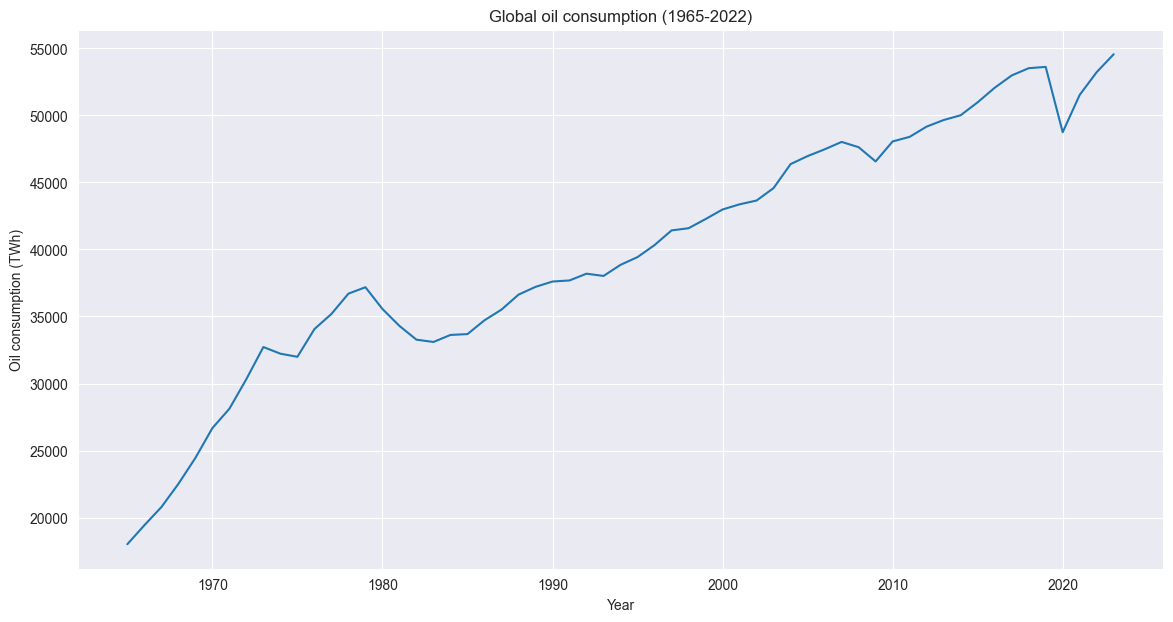

In [13]:
plt.figure(figsize=(14, 7))
sns.set_style("darkgrid")
sns.lineplot(data=con_df, x=con_df.index, y='World')

def hide_ticks():
    for i, l in enumerate(plt.gca().xaxis.get_ticklabels()):
        val = int(l.get_text())
        if val % 10 != 0:
            l.set_visible(False)

hide_ticks()    
    
plt.title('Global oil consumption (1965-2022)')
plt.xlabel('Year')
plt.ylabel('Oil consumption (TWh)')
plt.show()

## *OIl consumption according to income grouping*

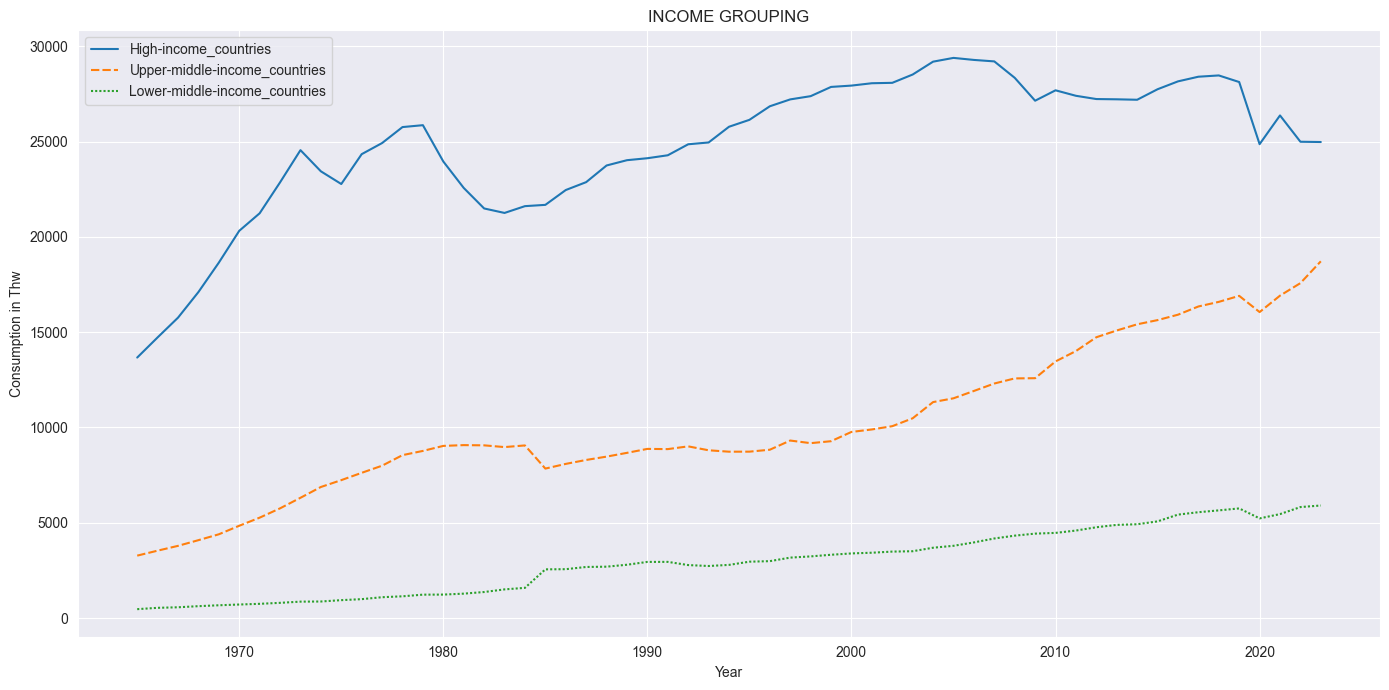

In [15]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 7))

plot=sns.lineplot(data=con_df.iloc[:, 1:4]) 
plt.xlabel('Year')
plt.ylabel('Consumption in Thw')
plt.title('INCOME GROUPING')
plt.legend(loc='upper left')
plot.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

## *Oil consumption trends in Africa*

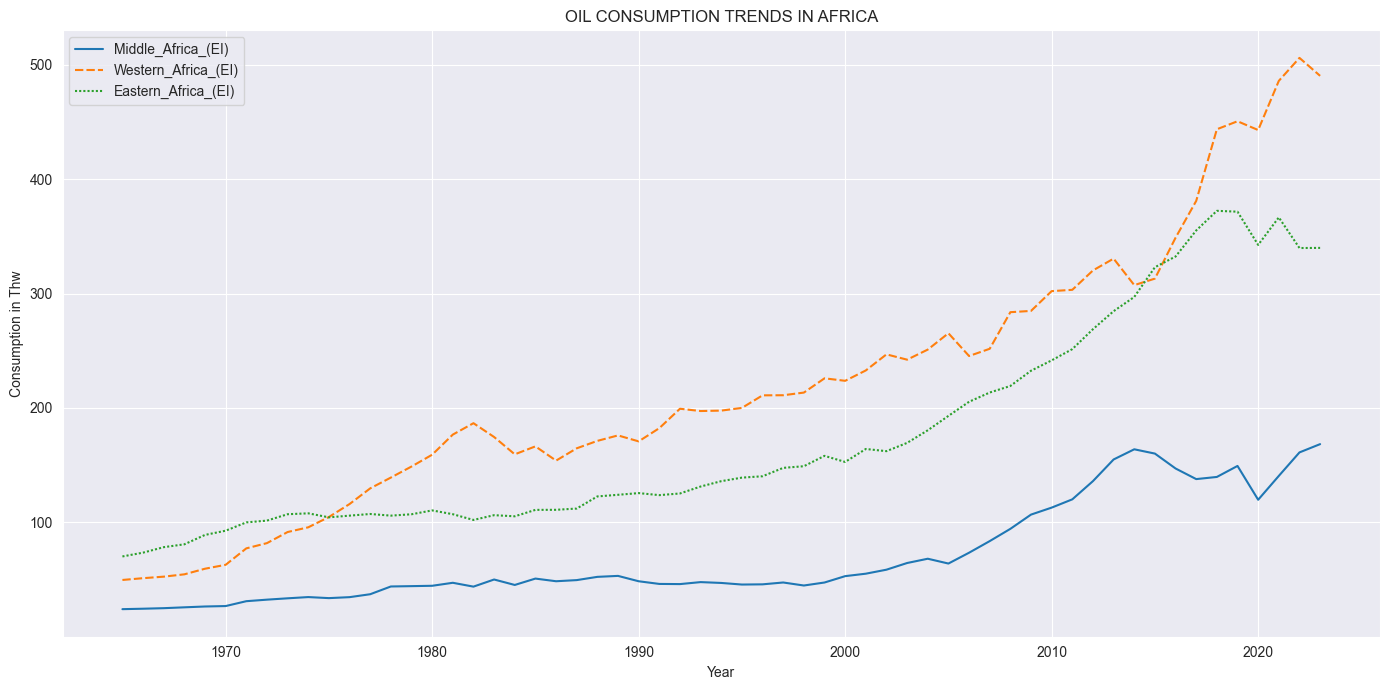

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 7))

plot=sns.lineplot(data=con_df[['Middle_Africa_(EI)',
                               'Western_Africa_(EI)', 'Eastern_Africa_(EI)']] ) 
plt.xlabel('Year')
plt.ylabel('Consumption in Thw')
plt.title('OIL CONSUMPTION TRENDS IN AFRICA')
plt.legend(loc='upper left')
plot.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

## *EI regions oil consumption comparison*

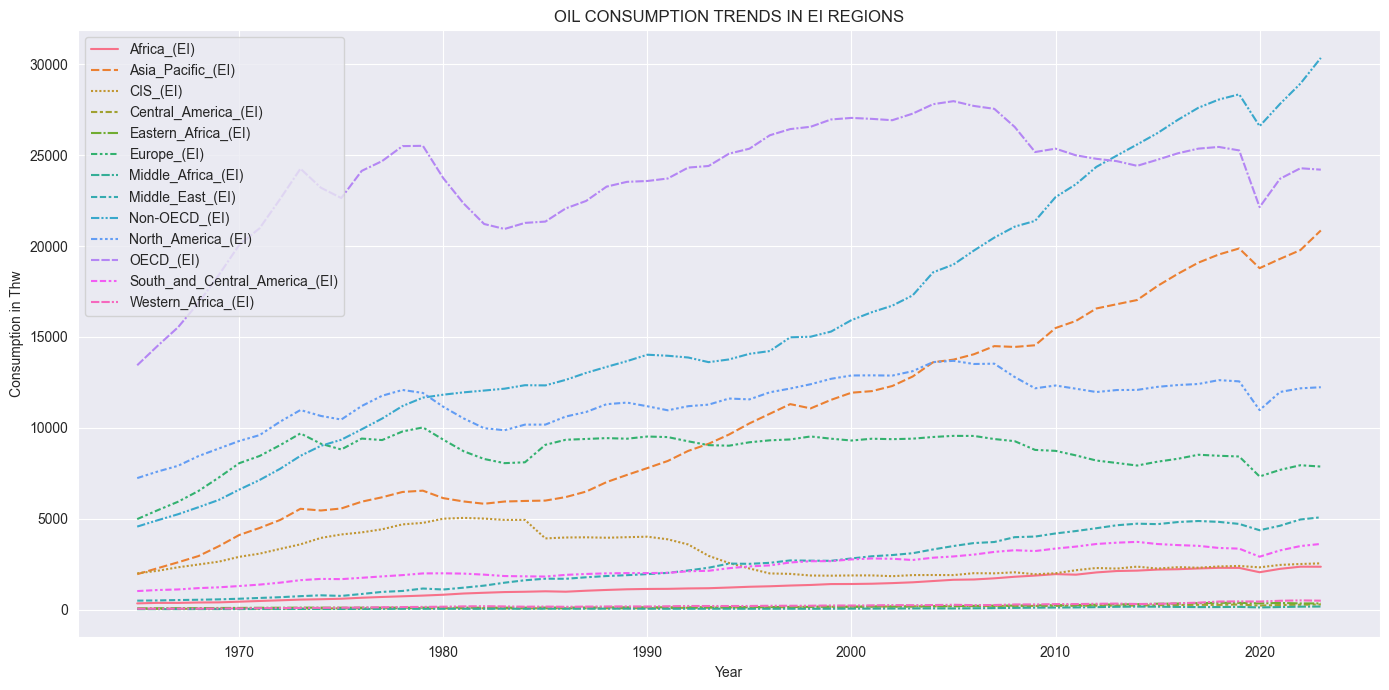

In [16]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 7))

plot=sns.lineplot(data=con_df.iloc[:, 4:17]) 
plt.xlabel('Year')
plt.ylabel('Consumption in Thw')
plt.title('OIL CONSUMPTION TRENDS IN EI REGIONS')
plt.legend(loc='upper left')
plot.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

## *Top 10 countries with highest consumption*

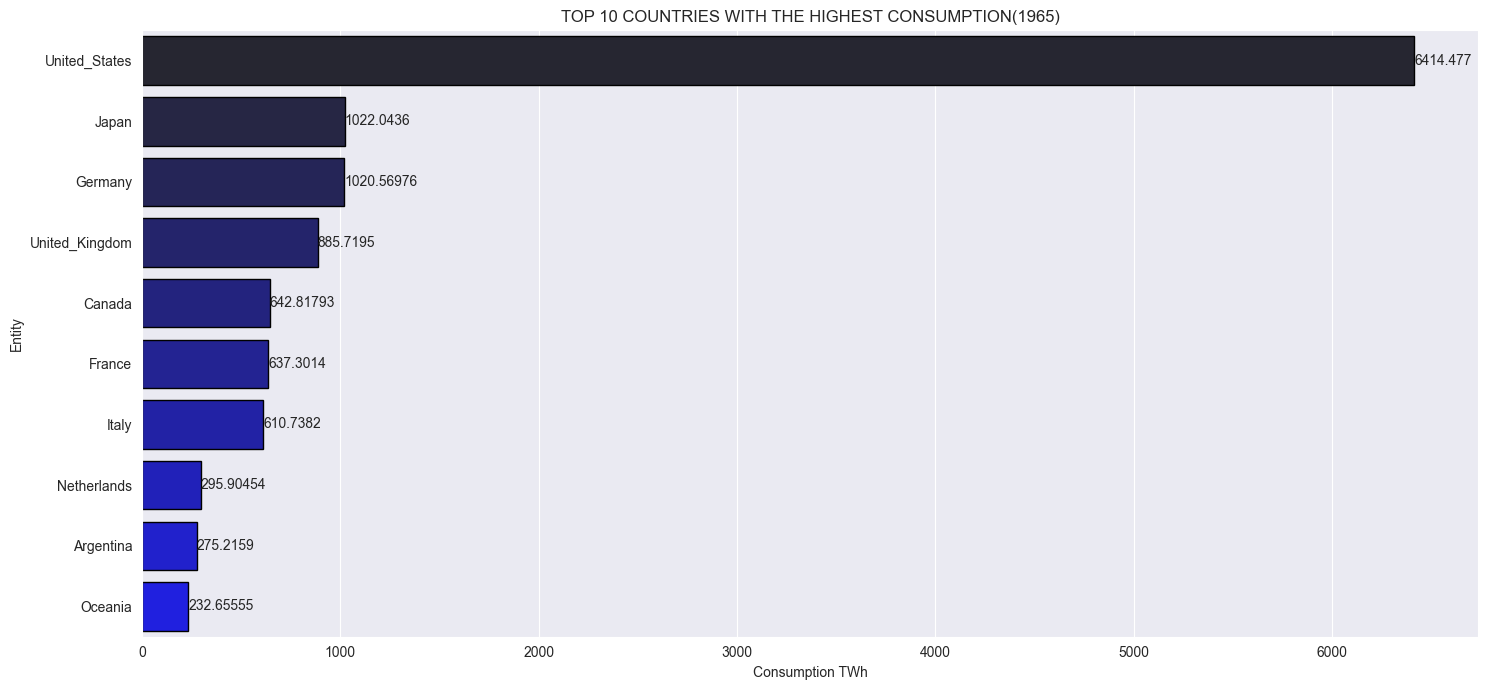

In [3]:
idx = con_df.columns.get_loc('Algeria') # index of the first country

def plot_top_ten_countries(year): 
    i = con_df.index.get_loc(year)# index i, year
    Top_10 = con_df.iloc[i, idx:].sort_values(ascending=False)
    top_10 = Top_10.head(10) # Top 10
    
    sns.set_style("darkgrid")
    plt.figure(figsize=(15, 7))
    columns = top_10.index
    values = top_10.values
    
    #bar plot
    sns.barplot(x=values, y=columns, hue=columns, palette= "dark:blue", edgecolor='black')
    plt.title(f'TOP 10 COUNTRIES WITH THE HIGHEST CONSUMPTION({year})')
    plt.ylabel('Entity')
    plt.xlabel('Consumption TWh')

    #add values on top of the bars
    for i, value in enumerate(values):
        plt.text(value + 0.1, i, str(value), va='center')
    
    plt.tight_layout()
    plt.show()

# 1965
plot_top_ten_countries(1965)

### *Growth rate of the Top 10 consumer countries*

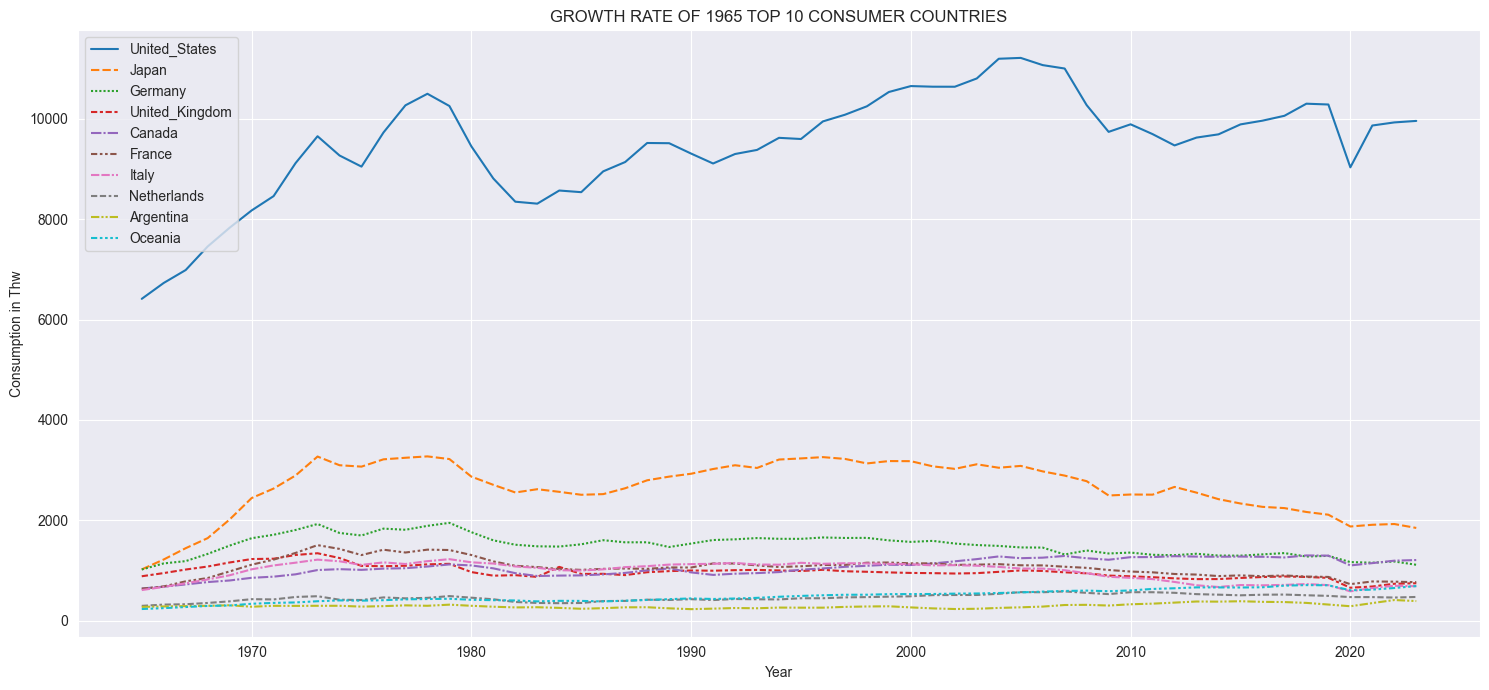

In [6]:
def plot_growth_rate(year):
    i = con_df.index.get_loc(year)
    Top_10 = con_df.iloc[i, idx:].sort_values(ascending=False)
    top_10 = Top_10.head(10) 

    sns.set_style("darkgrid")
    plt.figure(figsize=(15, 7))
    clmns = top_10.index
    vls = top_10.values

    sns.lineplot(data=con_df[clmns])
    plt.xlabel('Year')
    plt.ylabel('Consumption in Thw')
    plt.title(f'GROWTH RATE OF {year} TOP 10 CONSUMER COUNTRIES')
    plt.legend(loc='upper left')
    #plot.tick_params(labelsize=10)

    plt.tight_layout()
    plt.show()
    
    
plot_growth_rate(1965)

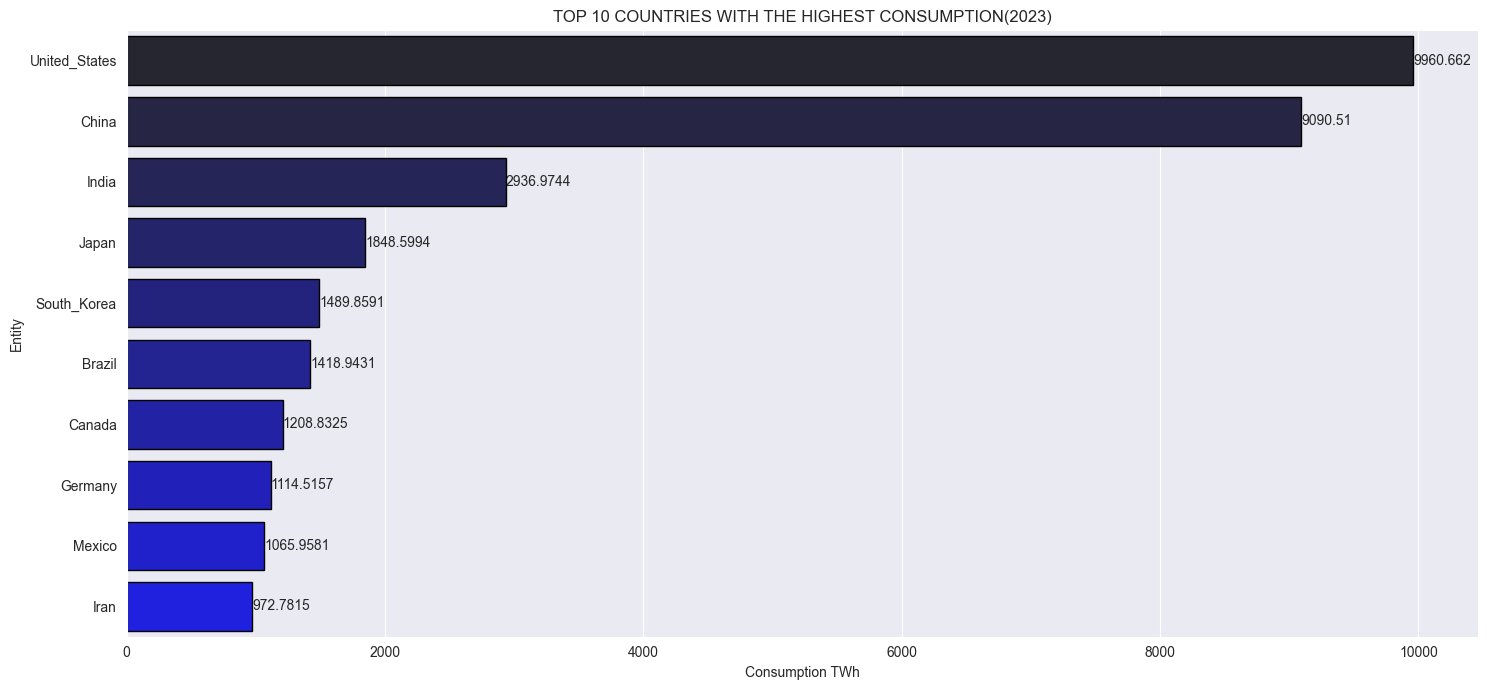

In [7]:
#Top 10  entities with highest consumption as of 2023
plot_top_ten_countries(2023)

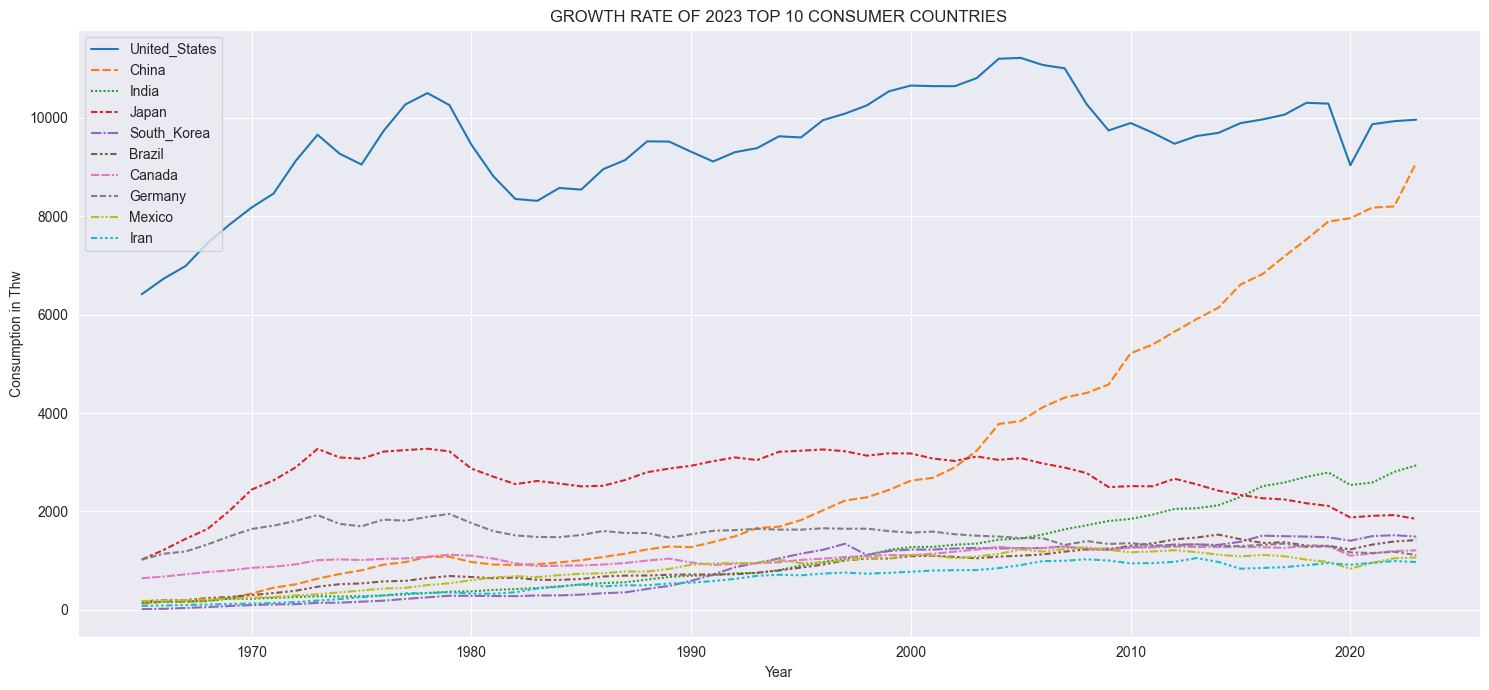

In [8]:
#Growth rate of the Top 10 consumer countries as of 2023
plot_growth_rate(2023)